___
# Exercício: TLC, Erro Amostral, Margem de erro e Tamanho Amostral
___
## Aula 21

<div id="indice"></div>

## Índice

- [Tempo de espera na fila do *check-in*](#tempoespera)
- [Concentração de Cálcio em águas de lagos](#calcio)
- [Tomando decisões com TLC - Resistores](#tomando-decisoes)
___

In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from math import sqrt

___

<div id="tempofila"></div>

# Tempo de espera na fila com uso do TLC

(Baseado no Exercício 7-12 Montgomery). 

O tempo que um consumidor esperando na fila de *check-in* de um aeroporto é uma variável aleatória com média de $\mu$ minutos e desvio padrão de $3.5$ minuto.
Suponha que uma amostra aleatória de $49$ consumidores seja observada.

**Responda:** (<a href="#respostas1">Respostas</a>)

**a)** Seja $\overline{X}$ o tempo médio de espera na fila de *check-in* considerando uma amostra de 49 consumidores selecionados aleatoriamente. Qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)? Aqui foi feito uso do TLC? Justifique porquê.

In [115]:
# ESCREVA SUA RESPOSTA AQUI

### IMPORTANTE para assumir nos próximos itens:

A concessionária desse aeroporto afirma, independente da operadora aérea, que o **tempo médio IDEAL de espera na fila de *check-in* deva ser de $8.2$ minutos**.

**b)** Sob a hipótese de que a afirmação da concessionária procede, construa um gráfico para visualizar a distribuição de $X$ e um de $\overline{X}$. Explique o que cada uma representa.

In [116]:
# ESCREVA SUA RESPOSTA AQUI

In [117]:
mu = 8.2
dp = 3.5
var = dp**2

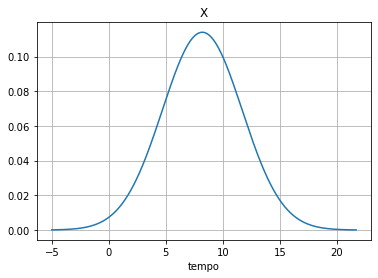

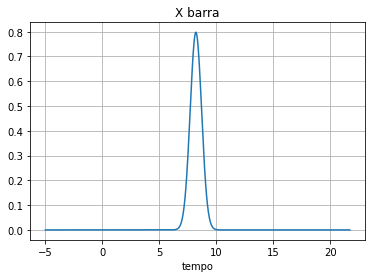

In [118]:
x = np.linspace(-5,21.7,1000)

X = stats.norm.pdf(x, mu, dp)
Xbarra = stats.norm.pdf(x, mu, ((3.5**2)/49)**0.5)

plt.title('X')
plt.xlabel('tempo')
plt.grid(True)
plt.plot(x,X)
plt.show()

plt.title('X barra')
plt.xlabel('tempo')
plt.grid(True)
plt.plot(x,Xbarra)
plt.show()


**c)** Assuma que $\mu=8.2$ minutos. Encontre a probabilidade de que o tempo médio de espera na fila seja:
  * Menor do que 10 minutos
  * Entre 8 e 10 minutos
  * Maior do que 9 minutos

In [119]:
# ESCREVA SEU CÓDIGO AQUI

In [120]:
mu = 8.2
dp = ((3.5**2)/49)**0.5

print(stats.norm.cdf(10,mu,dp))
print(stats.norm.cdf(10,mu,dp)-stats.norm.cdf(8,mu,dp))
print(1-stats.norm.cdf(9,mu,dp))

0.9998408914098424
0.6552626330201661
0.054799291699557884


**d)** Assuma que $\mu=8.2$ minutos. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=49$, que contemplam $95\%$ das possíveis médias amostrais mais próximas de $\mu$.

Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [121]:
# ESCREVA SEU CÓDIGO AQUI

In [122]:
mu = 8.2
dp = ((3.5**2)/49)**0.5

intervalo = stats.norm.interval(0.95,mu,dp)
print(intervalo)

(7.220018007729973, 9.179981992270026)


**e)** Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=8.2$ minutos, $n=49$ e coeficiente de confiança igual a $95\%$.

Para tanto, considere a seguinte definição:
  * **Margem de erro:** é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar a média populacional, quando considera 95% das possíveis médias amostrais ($\overline{X}$) mais próximos do verdadeiro valor ($\mu$).

In [123]:
# ESCREVA SEU CÓDIGO AQUI

In [124]:
8.2-intervalo[0]

0.9799819922700266

**f)** Considerando agora que $\mu$ é desconhecido, obtenha a margem de erro quando $n=49$ e coeficiente de confiança igual a $95\%$.

**Dica:** Aqui será necessário fazer uso da Normal Padrão, porém padronização da média amostral, ou seja, 
$$Z = \frac{\overline{X}-\mu}{\sigma/\sqrt{n}} \sim N(0; 1)$$

In [125]:
# ESCREVA SEU CÓDIGO AQUI

In [126]:
intervalo = stats.norm.interval(0.95,0,1)
intervalo

(-1.959963984540054, 1.959963984540054)

In [127]:
denominador = 3.5/49**0.5
Xbarra_menos_media = intervalo[1]*denominador
Xbarra_menos_media

0.979981992270027

**g)** Qual deveria ser o tamanho da amostra para se ter uma margem de erro de $0.5$ minutos e coeficiente de confiança igual a $95\%$.

In [128]:
# ESCREVA SEU CÓDIGO AQUI

In [129]:
numerador = 0.5
z = intervalo[1]
sigma = 3.5
n = (z/(numerador/sigma))**2
print(n)

188.23148221401217


In [148]:
mu = 2
dp = 0.4

stats.norm.cdf(2.4,loc=mu,scale=dp)

0.8413447460685429

In [149]:
stats.norm.cdf(1,loc=0,scale=1)

0.8413447460685429

___

<div id="calcio"></div>

# Concentração de cálcio em águas de lagos

Assuma o interesse em estudar a concentração média de cálcio em águas de lagos de uma determinada região. Considere ainda que o desvio padrão populacional da variável de interesse seja conhecido e igual a 0,10 u.m.

**Responda:** (<a href="#respostas2">Respostas</a>)

**a)** Qual a distribuição de probabilidades da média amostral?

In [130]:
# ESCREVA SUA RESPOSTA AQUI

In [131]:
normal

NameError: name 'normal' is not defined

**b)** Considerando um coeficiente de confiança igual a 98% e uma amostra de tamanho igual a 100, qual deve ser a margem de erro dessa pesquisa?

In [132]:
# ESCREVA SUA RESPOSTA AQUI

In [133]:
intervalo = stats.norm.interval(0.98,0,1)
print(intervalo)
denominador = 0.10/100**0.5
Xbarra_menos_media = intervalo[1]*denominador
Xbarra_menos_media

(-2.3263478740408408, 2.3263478740408408)


0.02326347874040841

**c)** Considerando um coeficiente de confiança igual a 98% e uma margem de erro igual a 0,015 u.m., qual deve ser o tamanho da amostra?

In [134]:
# ESCREVA SUA RESPOSTA AQUI

In [135]:
numerador = 0.015
z = intervalo[1]
sigma = 0.10
n = (z/(numerador/sigma))**2
print(n)

240.5286413801929


___
<div id="tomando-decisoes"></div>

# Tomando decisões com uso do TLC

Vamos considerar agora um exemplo (baseado no Exemplo 7-1 Montgomery). 

Um fabricante de componentes eletrônicos afirma que os resistores produzidos por ele possuem uma resistência média de $100 \Omega$ e um desvio padrão de $2 \Omega$. A distribuição da resistência de cada resistor é normal.

Antes de fechar uma grande compra com esse fabricante, considerando seus conhecimentos adquiridos ao longo da graduação no Insper, você decidiu solicitar uma pequena amostra de 25 resistores para realizar um teste de qualidade. O objetivo desta parte da atividade é decidir se você confia ou não na palavra do fabricante.

Considere aqui o valor de $\sigma=2$ teórica não esteja sendo questionado sobre a qualidade do fabricante.

**Responda:**(<a href="#respostas3">Respostas</a>)

**a)** Seja $\overline{X}$ a resistência média de uma amostra com 25 resistores selecionados aleatoriamente. De acordo com o TLC, qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)?

In [136]:
# ESCREVA SUA RESPOSTA AQUI

In [137]:
# normal
mu = 100
var = (2**2/25)

print(dp)

0.5


### IMPORTANTE para assumir nos próximos itens:

Assuma que o fabricante afirma que esteja produzindo resistores de acordo com as especificações, ou seja, com $\mu=100 \Omega$.

**b)** Sob a hipótese de que os resistores foram produzidos de acordo com especificação do fabricante, construa um gráfico para visualizar a distribuição de $X$ e um de $\overline{X}$. Explique o que cada uma representa.

In [138]:
# ESCREVA SEU CÓDIGO AQUI

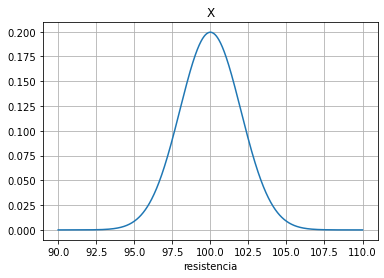

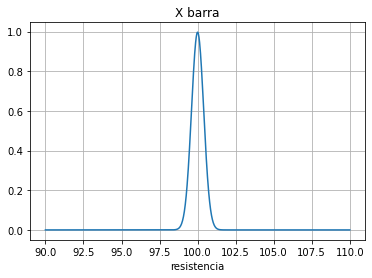

In [139]:
mu = 100

dp_X = 2
dp_Xbarra = (2**2/25)**0.5

x = np.linspace(90,110,1000)

X = stats.norm.pdf(x, mu, dp_X)
Xbarra = stats.norm.pdf(x, mu, dp_Xbarra)

plt.title('X')
plt.xlabel('resistencia')
plt.grid(True)
plt.plot(x,X)
plt.show()

plt.title('X barra')
plt.xlabel('resistencia')
plt.grid(True)
plt.plot(x,Xbarra)
plt.show()


**c)** Sob a hipótese de que os resistores foram produzidos de acordo com especificação do fabricante. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=25$, que contemplam $90\%$ das possíveis médias amostrais mais próximas de $\mu$.
Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [140]:
# ESCREVA SEU CÓDIGO AQUI

In [141]:
intervalo = stats.norm.interval(0.9,mu,dp_Xbarra)
print(intervalo)

(99.34205854921942, 100.65794145078058)


**d)** Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=100 \Omega$, $n=25$ e coeficiente de confiança igual a $90\%$.

In [142]:
# ESCREVA SEU CÓDIGO AQUI

In [143]:
mu-intervalo[0]

0.6579414507805836

**e)** Se uma amostra de 25 resistores é coletada e a média amostral calculada é igual a $\overline{x}=98.929451$. 

Com $90\%$ de confianca, você acredita que essa amostra foi coletada de um população cuja verdadeira média é $\mu=100\Omega$? Ou seja, voce confia no fabricante?

In [144]:
# ESCREVA SEU CÓDIGO AQUI

In [147]:
intervalo = stats.norm.interval(0.9,100,2/5)
print(intervalo)

xbarra = 98.929451
z = intervalo[0]
n = 25
dp = 2

denominador = dp/n**0.5

mu = -(z*denominador-xbarra)
print(mu)

(99.34205854921942, 100.65794145078058)
59.192627580312234


<div id="respostas"></div>

---
# Respostas

<a href="#indice">Voltar para o índice</a>

<div id="respostas1"></div>

### Respostas do exercício - Tempo de espera na fila do *check-in*

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 12.25/49) ou, equivalente, $\overline{X}$ ~ Normal($\mu$, 0.25)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc1_itemb.png)


**item c)** 
* P($\overline{X}$ < 10) = 0.99984
* P(8 < $\overline{X}$ < 10) = 0.65526
* P($\overline{X}$ > 9) = 0.054799


**item d)** A região de 95% das possíveis médias amostrais mais próximas de $\mu$=8.2 vai de: 
7.22002 até 9.17998


**item e)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 95% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.979982
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.979982


**item f)** A margem de erro mantendo $n=49$ e 95% de confiança é 0.979982


**item g)** Tamanho da amostra para margem de erro de 0.5 minuto mantendo 95% de confiança é 189.

<a href="#tempofila">Voltar para enunciado</a>

<div id="respostas2"></div>

### Respostas do exercício - Concentração de cálcio

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 0.01/n)


**item b)** A margem de erro mantendo $n=100$ e 98% de confiança é 0.02326


**item g)** Tamanho da amostra para margem de erro de 0.015 minuto mantendo 98% de confiança é 241.

<a href="#calcio">Voltar para enunciado</a>

___

<div id="respostas3"></div>

### Respostas do exercício - Tomando decisões com TLC

**item a)** Normal(100, 0.16)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc2_itemb.png)


**item c)** A região de 90% das possíveis médias amostrais mais próximas de mu=100 vai de: 
99.3421 até 100.658

**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 90% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.657941
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.657941


**item e)** Como xbarra=98.929451 está aquém da menor média, então não há evidências para se confiar na afirmação do fabricante, com 90% de confiança.


<a href="#tomando-decisoes">Voltar para enunciado</a>